In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint
from functools import partial
# Basic parameters


In [37]:
def flat_with_noise(n_year=5, chgsize=50):
    # function to produce a level change
    dmin = int(-1*chgsize)
    dmax = int(chgsize)
    return([randint(dmin, dmax) for x in range(n_year)])

In [38]:
def impulse(n_year=5, impyr=2, chgsize=50,impsign=1):
    # function to produce an impulsive change 
    out = [0 for x in range(n_year)]
    out[impyr] = impsign*chgsize 
    return(out)

In [39]:
def cvx_change(n_years=5,alpha=0.75,chgsign=1, chgsize=50):
    #function to produce convex change 
    # i.e. change where the time series of population falls below the line connecting any two 
    # points on the time series, i.e. alpha*exp(t) or alpha*exp(n_years - t)
    out = np.linspace(1,n_years,n_years)/n_years
    if chgsign > 0:
        output = alpha*np.exp(out)
        
    else:
        # handle the negative case 
        output = alpha*np.exp(n_years - out)
        
    output =  1.0 - (max(output)-output)/(max(output) - min(output))
    return(chgsize*output)

In [40]:
def ccv_change(n_years=5,alpha=0.75,chgsign=1, chgsize=50):
    #function to produce convex change 
    # i.e. change where the time series of population falls below the line connecting any two 
    # points on the time series, i.e. alpha*exp(t) or alpha*exp(n_years - t)
    out = np.linspace(1,n_years,n_years)/n_years
    if chgsign < 0:
        output = alpha*np.exp(out)
        
    else:
        # handle the positive case 
        output = alpha*np.exp(n_years - out)
        
    output = (max(output)-output)/(max(output) - min(output))
    return(chgsize*output)

In [41]:

sscRat = 100
tolerance = (-0.5, 0.25)
Alphas = np.linspace(.1,1,10)
pselect = [0.1 for x in Alphas]
growthPats = {'flat':flat_with_noise, 
              'impUp':impulse, 
              'impDn':partial(impulse, impsign=-1), 
              'cvxUp':cvx_change, 
              'cvxDn':partial(cvx_change, chgsign=-1),
              'ccvUp':ccv_change,
              'ccvDn':partial(ccv_change, chgsign=-1)
              }
NSchool = 11
len_history = 50

In [42]:
def simulate_history(start_value=50, total_years=50, period_length=5):
    history = []
    # need to add functionality to smooth the transitions 
    for _, tp in enumerate(range(total_years//period_length)):
        locidx = randint(0,len(growthPats)-1)
        # locidx = 3
        print(f"starting history {locidx}, a/k/a {repr(list(growthPats.values())[locidx])}")
        
        lochg = history[_-1][-1] if _ > 0 else start_value

        
        locfun = list(growthPats.values())[locidx](chgsize=lochg) + lochg
        local_h = np.squeeze(locfun)
        local_h = local_h[1:len(local_h) + 1]
        print(local_h)
        history.append(local_h)
        print("____")

    out = np.diff(np.hstack(history))
    sendout = [x for _, x in enumerate(out) if _ > 0 and x > 0 ]
    return sendout 

starting history 3, a/k/a <function cvx_change at 0x000001904F90B880>
[4722.62868751 5605.24935955 6683.28468279 8000.        ]
____
starting history 0, a/k/a <function flat_with_noise at 0x000001904F90AB60>
[11336. 11351. 11547. 11050.]
____
starting history 1, a/k/a <function impulse at 0x000001904F909DA0>
[11050. 22100. 11050. 11050.]
____
starting history 1, a/k/a <function impulse at 0x000001904F909DA0>
[11050. 22100. 11050. 11050.]
____
starting history 6, a/k/a functools.partial(<function ccv_change at 0x000001904F908400>, chgsign=-1)
[20103.73825077 17665.49864424 14687.42606378 11050.        ]
____
starting history 5, a/k/a <function ccv_change at 0x000001904F908400>
[14687.42606378 17665.49864424 20103.73825077 22100.        ]
____
starting history 6, a/k/a functools.partial(<function ccv_change at 0x000001904F908400>, chgsign=-1)
[40207.47650153 35330.99728849 29374.85212756 22100.        ]
____
starting history 2, a/k/a functools.partial(<function impulse at 0x000001904F909

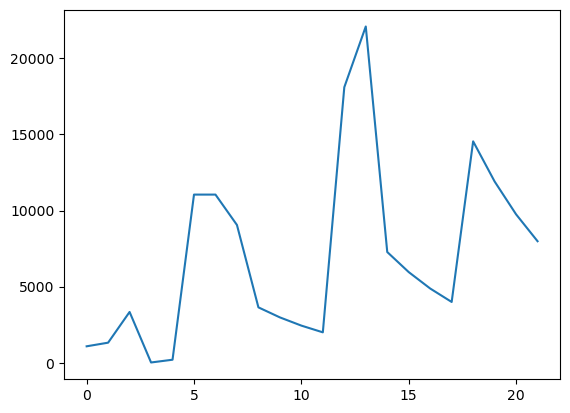

In [43]:
plt.plot(simulate_history(start_value=4000))

In [44]:
JJ = simulate_history()

starting history 3, a/k/a <function cvx_change at 0x000001904F90B880>
[ 59.03285859  70.06561699  83.54105853 100.        ]
____
starting history 5, a/k/a <function ccv_change at 0x000001904F908400>
[132.91788293 159.86876601 181.93428281 200.        ]
____
starting history 1, a/k/a <function impulse at 0x000001904F909DA0>
[200. 400. 200. 200.]
____
starting history 2, a/k/a functools.partial(<function impulse at 0x000001904F909DA0>, impsign=-1)
[200.   0. 200. 200.]
____
starting history 2, a/k/a functools.partial(<function impulse at 0x000001904F909DA0>, impsign=-1)
[200.   0. 200. 200.]
____
starting history 6, a/k/a functools.partial(<function ccv_change at 0x000001904F908400>, chgsign=-1)
[363.86856562 319.73753202 265.83576586 200.        ]
____
starting history 3, a/k/a <function cvx_change at 0x000001904F90B880>
[236.13143438 280.26246798 334.16423414 400.        ]
____
starting history 0, a/k/a <function flat_with_noise at 0x000001904F90AB60>
[332. 343. 715. 163.]
____
startin